In [57]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [58]:
df = pd.read_csv('HR_comma_sep.csv')

In [59]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [60]:
df.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [61]:
df.describe()
#Work accident, left, promotion last 5 years are booleans

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


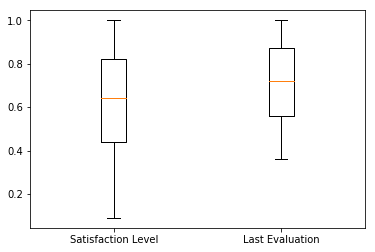

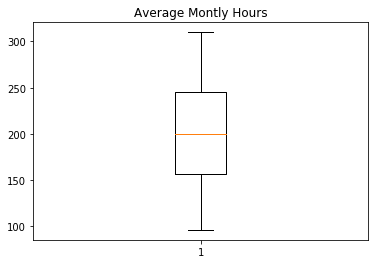

In [62]:
plt.boxplot((df['satisfaction_level'], df['last_evaluation']), labels = ('Satisfaction Level', 'Last Evaluation'))
plt.show()

plt.boxplot(df['average_montly_hours'])
plt.title('Average Montly Hours')
plt.show()
#no outliers

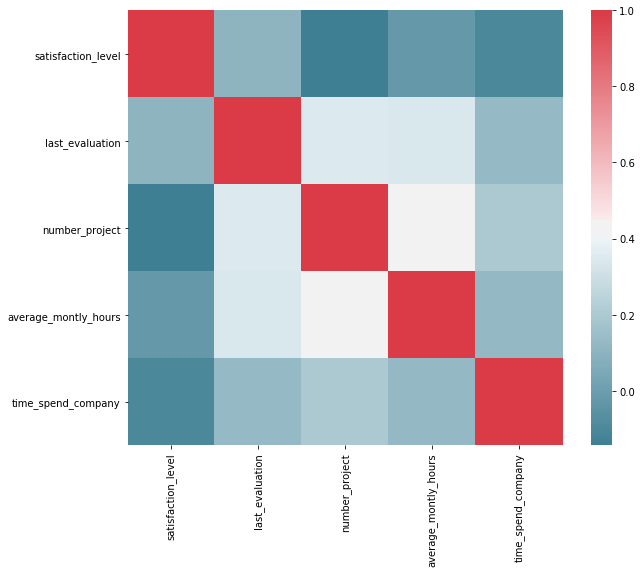

In [66]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [22]:
df['left'].value_counts()/len(df)
#left percentages

0    0.761917
1    0.238083
Name: left, dtype: float64

In [23]:
df['sales'].value_counts()/len(df)
#sales percentages

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: sales, dtype: float64

In [24]:
df['salary'].value_counts()/len(df)
#salary percentages

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

In [25]:
df['Work_accident'].value_counts()/len(df)
#work accident percentages

0    0.85539
1    0.14461
Name: Work_accident, dtype: float64

In [26]:
df['promotion_last_5years'].value_counts()/len(df)
#promotion percentages
#only 2% has had a promotion

0    0.978732
1    0.021268
Name: promotion_last_5years, dtype: float64

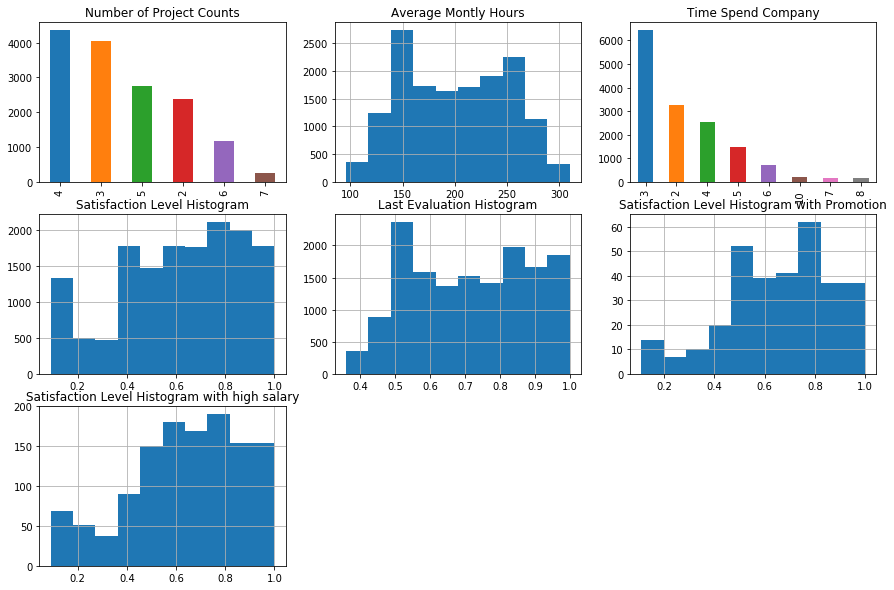

In [27]:
fig = plt.figure(figsize = (15, 10))
fig_dims = (3, 3)

plt.subplot2grid(fig_dims, (0, 0))
df['number_project'].value_counts().plot(kind = 'bar', title = 'Number of Project Counts')

plt.subplot2grid(fig_dims, (0, 1))
df['average_montly_hours'].hist()
plt.title('Average Montly Hours')

plt.subplot2grid(fig_dims, (0, 2))
df['time_spend_company'].value_counts().plot(kind = 'bar', title ='Time Spend Company')

plt.subplot2grid(fig_dims, (1, 0))
df['satisfaction_level'].hist()
plt.title('Satisfaction Level Histogram')

plt.subplot2grid(fig_dims, (1, 1))
df['last_evaluation'].hist()
plt.title('Last Evaluation Histogram')

plt.subplot2grid(fig_dims, (1, 2))
df[df['promotion_last_5years']==1]['satisfaction_level'].hist()
plt.title('Satisfaction Level Histogram with Promotion')

plt.subplot2grid(fig_dims, (2, 0))
df[df['salary']=='high']['satisfaction_level'].hist()
plt.title('Satisfaction Level Histogram with high salary')

plt.show()

#maybe pie charts in some case are better (time spend company or n.proj)

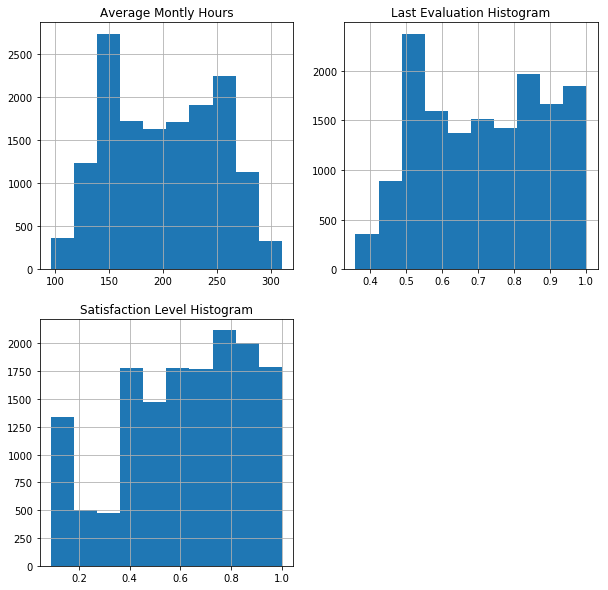

In [39]:
fig = plt.figure(figsize = (10, 10))
fig_dims = (2, 2)

plt.subplot2grid(fig_dims, (0, 0))
df['average_montly_hours'].hist()
plt.title('Average Montly Hours')

plt.subplot2grid(fig_dims, (1, 0))
df['satisfaction_level'].hist()
plt.title('Satisfaction Level Histogram')

plt.subplot2grid(fig_dims, (0, 1))
df['last_evaluation'].hist()
plt.title('Last Evaluation Histogram')

plt.show()

#maybe pie charts in some case are better (time spend company or n.proj)

C:\Users\danie\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


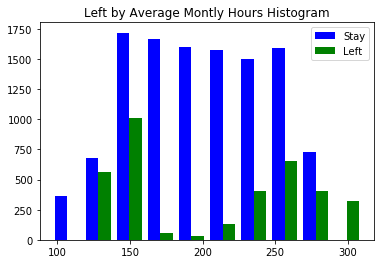

In [28]:
df1 = df[df['left'] == 0]['average_montly_hours']
df2 = df[df['left'] == 1]['average_montly_hours']
plt.hist([df1, df2], color = ['b', 'g'])
plt.title('Left by Average Montly Hours Histogram')
plt.legend(('Stay', 'Left'), loc = 'best')
plt.show()

#two peaks, one for avg_hours = 150 and one for avg_hours = 250

C:\Users\danie\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


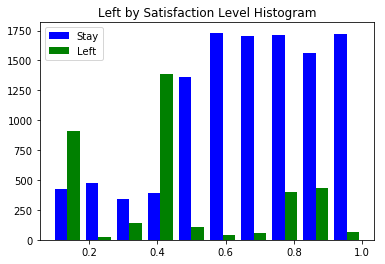

In [29]:
df1 = df[df['left'] == 0]['satisfaction_level']
df2 = df[df['left'] == 1]['satisfaction_level']
plt.hist([df1, df2], color = ['b', 'g'])
plt.title('Left by Satisfaction Level Histogram')
plt.legend(('Stay', 'Left'), loc = 'best')
plt.show()

#3 peaks, also people with high sat_lvl left

C:\Users\danie\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


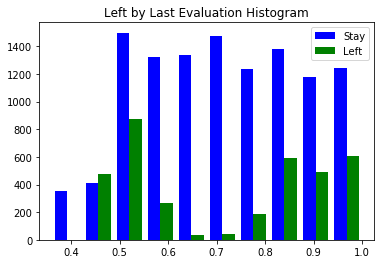

In [30]:
df1 = df[df['left'] == 0]['last_evaluation']
df2 = df[df['left'] == 1]['last_evaluation']
plt.hist([df1, df2], color = ['b', 'g'])
plt.title('Left by Last Evaluation Histogram')
plt.legend(('Stay', 'Left'), loc = 'best')
plt.show()
#2 peaks, there is something with this 3 variables

In [31]:
color_list = []
for row in df['left']:
    if row == 1:
        color_list.append('r')
    else:
        color_list.append('b')

#I use this list just like color manager in Knime, maybe there is a better way to do it

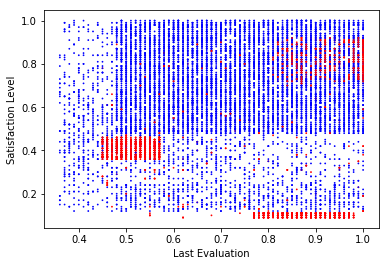

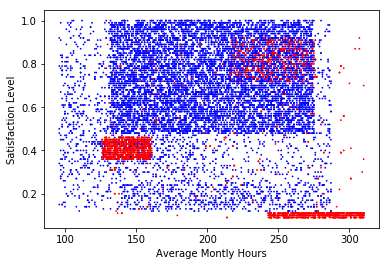

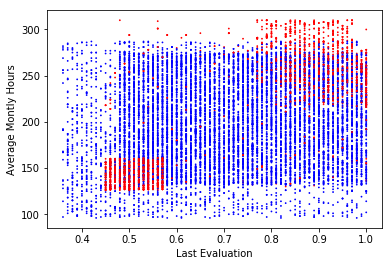

In [32]:
plt.scatter(df['last_evaluation'], df['satisfaction_level'], s = 0.6, c = color_list)
plt.xlabel('Last Evaluation')
plt.ylabel('Satisfaction Level')
plt.show()
#3 clusters of people who left

plt.scatter(df['average_montly_hours'], df['satisfaction_level'], s = 0.6, c = color_list)
plt.xlabel('Average Montly Hours')
plt.ylabel('Satisfaction Level')
plt.show()
#3 clusters again

plt.scatter(df['last_evaluation'], df['average_montly_hours'], s = 0.6, c = color_list)
plt.xlabel('Last Evaluation')
plt.ylabel('Average Montly Hours')
plt.show()
#2 clusters

#maybe it's meaningful a 3D scatter plot with these variables, I don't know how to do it yet

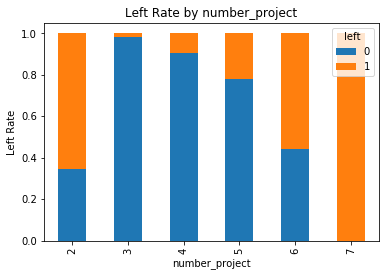

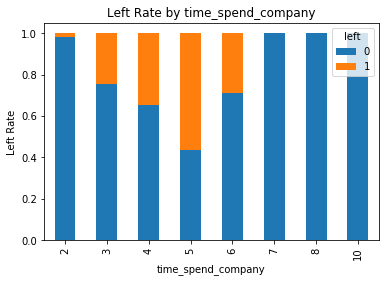

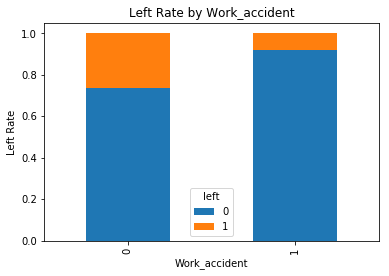

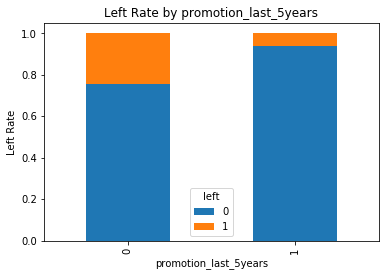

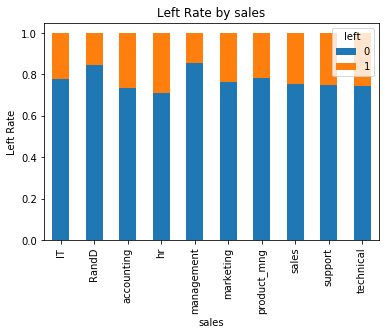

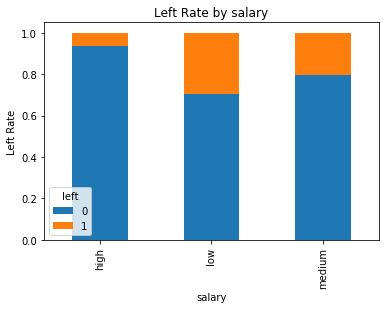

In [34]:
for el in df.columns:
    if(el != 'satisfaction_level' and el != 'last_evaluation' and el != 'left' and el != 'average_montly_hours'):
        xt = pd.crosstab(df[el], df['left'])
        xt_pct = xt.div(xt.sum(1).astype(float), axis=0)
        xt_pct.plot(kind = 'bar', stacked = True, title = 'Left Rate by {}'.format(el))
        plt.xlabel(el)
        plt.ylabel('Left Rate')
        plt.show()    
#some crosstab

#observations: n.proj = 7 everybody left, =6 or 2 a lot of people left
#              time_spend_company >= 7 nobody left
#              people with accidents left less than people without accidents (that's weird)
#              people with promotion (remember only 2%) left less
#              the department do not influences the left rate very much, just a little bit less in management dep
#              only few people with high salary left (people with high salary is only 8% of the whole dataset)
#              we could try to understand why people with high salary left